# WSI ćwiczenie 6
## QLearning

Mikołaj Wewiór
318407

In [16]:
import numpy as np
import matplotlib.pyplot as plt

import src.main as main
from src.QLearning import QL

In [17]:
def plotter(alpha: float = 0.1, gamma: float = 0.95, epsilon: float = 0.95):
    Q = QL(
        map_shape=(64, 4),
        learning_rate=alpha,
        discount=gamma,
        policy="Eps-greedy",  # Eps-greedy | Boltzman
        eps=epsilon,
        T=1,
    )

    s = 40620241
    results = main.main(seed=s, Q=Q, isShown=False)

    moves = results["moves"]

    last_moves = []
    last_moves_achived = []

    for m in moves:
        if type(m) is int:
            # reward_moves_count.append(m)
            last_moves.append(m)
            last_moves_achived.append(m)
        else:
            last_moves.append(0)

    ydata = last_moves
    xdata = list(range(1, len(ydata)+1))

    plt.figure()
    plt.grid(True)
    plt.plot(xdata, ydata, '--')
    plt.plot(xdata, ydata, '.')
    # plt.title(f"seed: {s}")
    plt.show()

In [18]:
# plotter(epsilon=0.99)

In [19]:
# plotter(epsilon=0.95)

In [20]:
# plotter(epsilon=0.9)

In [21]:
# plotter(epsilon=0.8)

In [22]:
# plotter(epsilon=0.7)

In [23]:
# plotter(epsilon=0.6)

In [24]:
stats = []

In [25]:
seeds = [318407, 4062024, 19122020, 27112002, 99815612]

In [26]:
all_results = []

for s in seeds:
    print(f"\n{s}")
    Q = QL(
        map_shape=(64, 4),
        learning_rate=0.1,
        discount=0.95,
        policy="Eps-greedy",  # Eps-greedy | Boltzman
        eps=0.95,
        T=1,
    )
    result = main.main(seed=s, Q=Q)
    all_results.append(result)
    print(result["moves"][-100::])

# all_results


318407


/home/wewiormik/.local/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


[43, 55, 'D', 'D', '_', 28, 80, 97, 55, 55, 41, 33, 'D', 'D', 39, 'D', '_', 'D', 'D', 34, 'D', 49, 65, 42, 33, 'D', 38, 91, 61, 36, 46, 61, 52, 'D', 'D', 100, 'D', 'D', 69, '_', 37, 92, 'D', 74, '_', 'D', '_', 'D', 80, 'D', 30, 58, 'D', 100, 27, 'D', 'D', '_', 'D', 'D', 42, '_', 61, 71, 'D', 58, 'D', 69, 47, 'D', 'D', '_', '_', 80, 37, 'D', 33, 68, 'D', 'D', 49, 99, 79, 77, 52, 'D', 52, '_', 36, 'D', 94, 'D', '_', 'D', '_', 78, 41, 'D', 68, 55]

4062024
['D', '_', 'D', 54, 53, 79, 72, 'D', 94, 'D', 94, 'D', '_', 46, 56, 31, 73, '_', 38, 81, 77, 98, 'D', '_', '_', 84, 'D', '_', 'D', 'D', 'D', 'D', 34, 48, 67, 36, 49, 56, 86, 85, 86, 69, 35, 32, 'D', 98, 62, 'D', 99, '_', 74, 56, 'D', 'D', 79, 56, 'D', 'D', 75, 'D', 74, 97, '_', 'D', 'D', 'D', 'D', 'D', 'D', 37, 80, 33, 'D', '_', 'D', 'D', 'D', 'D', 'D', '_', 75, 'D', 53, 'D', 33, 'D', '_', 'D', 'D', 67, 42, 'D', 'D', 77, 'D', 33, 'D', 'D', 'D', 'D']

19122020
['D', 41, 'D', 26, 92, 'D', 'D', '_', 'D', 'D', 'D', 76, 'D', 'D', 83, 'D', 'D

In [27]:
all_rewards_count = []

last_moves = []
last_moves_achived = []
reward_moves_count = []

for elem in all_results:

    rewards = elem["rewards"]
    all_rewards_count.append(rewards)

    moves = elem["moves"]  # [-100::]   # ["moves_learn"]
    last_moves.append([])
    last_moves_achived.append([])
    for m in moves:
        if type(m) is int:
            reward_moves_count.append(m)
            last_moves[-1].append(m)
            last_moves_achived[-1].append(m)
        else:
            last_moves[-1].append(0)

percentage_average_won = np.mean(all_rewards_count) / int(1e4)

percentage_average_moves = len(reward_moves_count) / 500
average_moves = np.mean(reward_moves_count)
std_moves = np.std(reward_moves_count)

stats.append({
    "alpha": all_results[0]["alpha"],
    "gamma": all_results[0]["gamma"],
    "epsilon": all_results[0]["epsilon"],
    "procentowe_osiagniecie_celu": percentage_average_won,
    "procentowe_os._celu_100_ostatnich": percentage_average_moves,
    "średnia_liczba_ruchów": average_moves,
    "odchylenie_liczby ruchów": std_moves
})

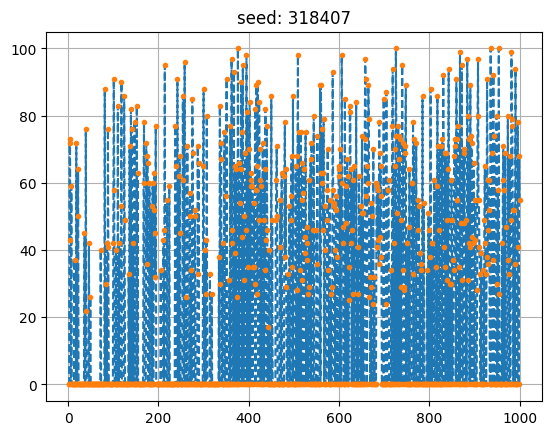

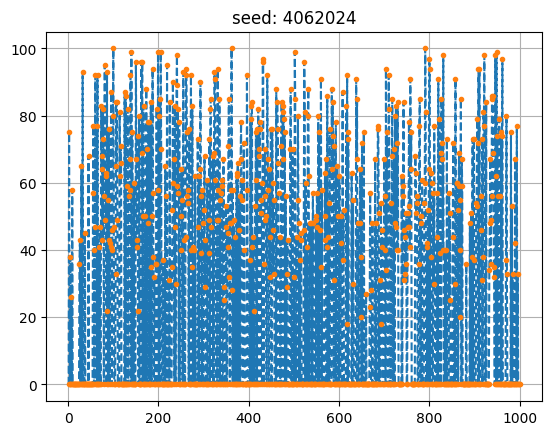

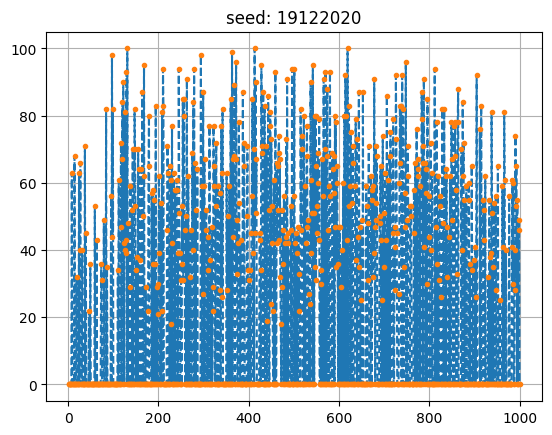

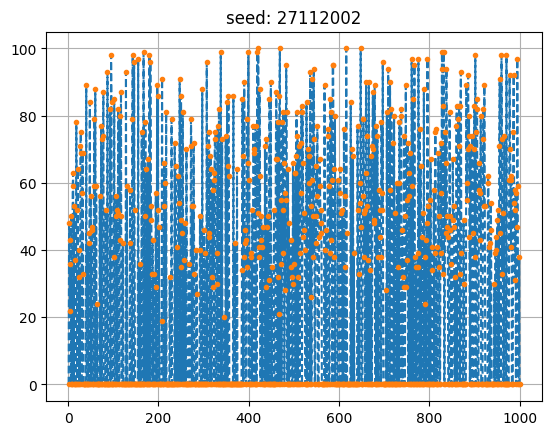

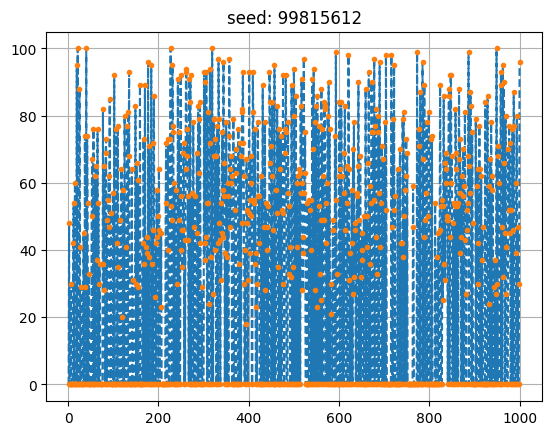

In [28]:
this_moves = last_moves  # last_moves_achived  #


for seed_moves, seed in zip(this_moves, seeds):
    plt.figure()
    plt.grid(True)
    ydata = seed_moves
    xdata = list(range(1, len(seed_moves)+1))
    plt.plot(xdata, ydata, '--')
    plt.plot(xdata, ydata, '.')
    plt.title(f"seed: {seed}")

In [29]:
# stats.insert(0, base_stat)